In [1]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy.stats import norm
import scipy.optimize as sco
import scipy
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# Crypto Trend Following

testing trend following on crypto (start with bitcoin).

Methods to test:
- Time Series Momentum
- Breakouts
- Moving Average Cross Over

Also try to optimize the best parameters

FUTURE WORK
- implement same models with week day data only (if to use Avanza or futures)

In [2]:
# load help function

%run crypto_help.ipynb

In [21]:
## Data import of WE

dat_tmp = yf.download('BTC-USD')
#dat_tmp = yf.download('DOT1-USD')
close = pd.DataFrame(dat_tmp['Close'])



####Convert to Week day data

close_5day = close[close.index.dayofweek < 5]

[*********************100%***********************]  1 of 1 completed


# Data Analysis

In [22]:
df_ret = close.pct_change(1).dropna()

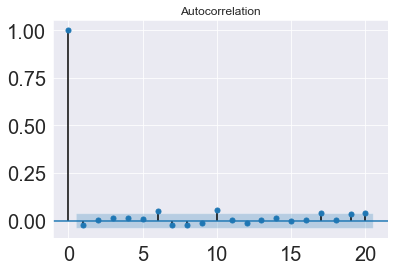

In [23]:
plot_acf(df_ret, lags=20)
plt.show()

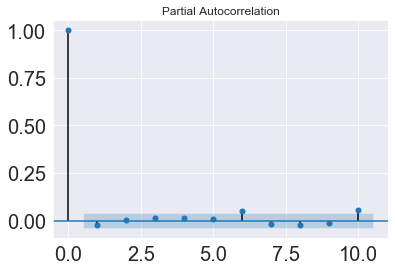

In [24]:
plot_pacf(df_ret, lags=10)
plt.show()

### Time Series Momentum

In [25]:
test = pd.DataFrame(range(1,100))
test.columns = ['lookback']
for i in range(len(test)):
    
    test.loc[i, 'metric'] = time_series(close ,test.loc[i, 'lookback'] , metric = 'sharpe')

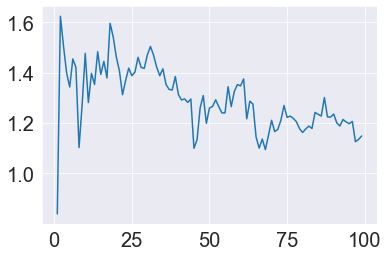

In [26]:
plt.plot(test['lookback'], test['metric']);
#print(test['metric'].max())

### Simple EWMA

In [27]:
test = pd.DataFrame(range(2,100))
test.columns = ['lookback']
for i in range(len(test)):
    
    test.loc[i, 'metric'] = MA_TF(close ,test.loc[i, 'lookback'] , metric = 'sharpe')

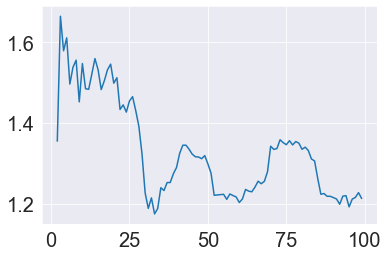

In [28]:
plt.plot(test['lookback'], test['metric']);
#print(test['metric'].max())

### Breakouts and Cross over:

Use functions

In [30]:
optimize_results(method = cross_over, data = close, metric = 'sharpe', plot = 'False')

Best Slow Moving Avergae/Long Breakout:  15 
Best Fast Moving Avergae/Exit Breakout:  10 
 sharpe :  1.4321379226929696


#### Equity Curve for Time Series Momentum

In [31]:
df_tmp = time_series(close ,15 , metric = 'data')
res = df_tmp[['Strategy_cum', 'Bench']]
strategy_evaluation(res, ['Bench'], 3000, freq = 'D')

,CAGR,Volatility,Sharpe,Sortino,Max DD,MAR,SWR,Skew,Kurtosis
Portfolio,69.2%,44.8%,1.40,1.43,-59%,1.17,53.2%,0.554,9.151
Bench,65.2%,62.6%,1.11,1.34,-83%,0.79,42.8%,-0.168,7.408


Number of Trades:  126.0 
Average holding time:  12.0 
Trades per Year:  17.8


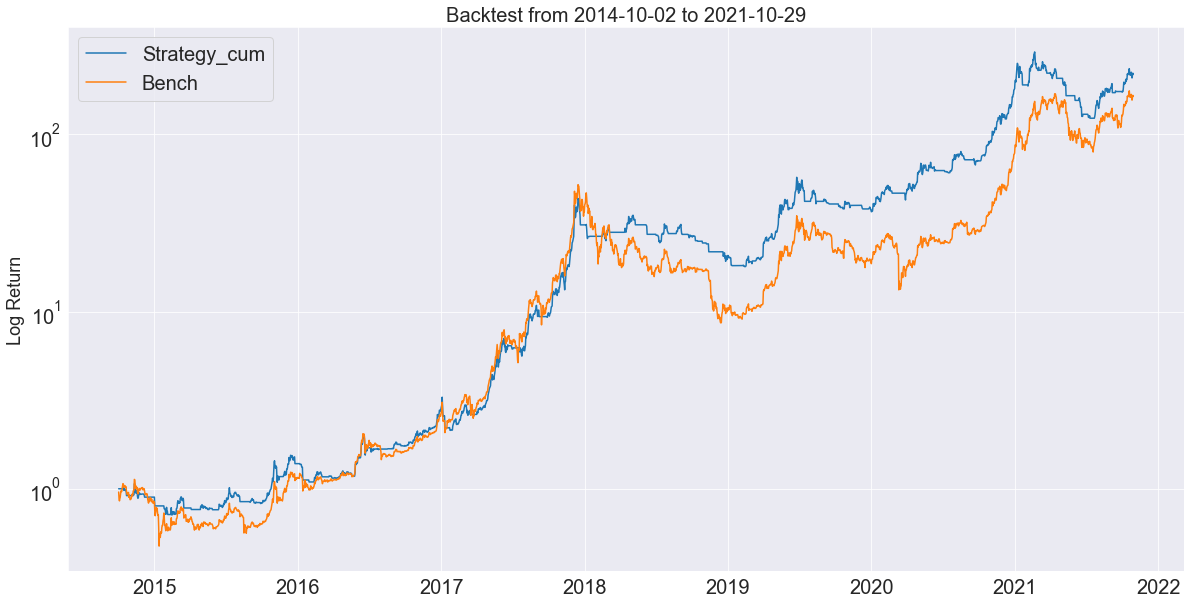

In [32]:
plot(res, "log") # "log" for log otherwise "" for lin
trade_analysis(df_tmp['signal'])

#### Equity Curve for Exponential and Price

In [34]:
df_tmp = MA_TF(close ,20 , metric = 'data')
res = df_tmp[['Strategy_cum', 'Bench']]
strategy_evaluation(res, ['Bench'], 3000, freq = 'D')

,CAGR,Volatility,Sharpe,Sortino,Max DD,MAR,SWR,Skew,Kurtosis
Portfolio,74.9%,43.2%,1.51,1.60,-39%,1.92,59.4%,0.833,9.667
Bench,62.1%,62.6%,1.08,1.31,-83%,0.75,39.7%,-0.162,7.361


Number of Trades:  136.0 
Average holding time:  11.0 
Trades per Year:  19.1


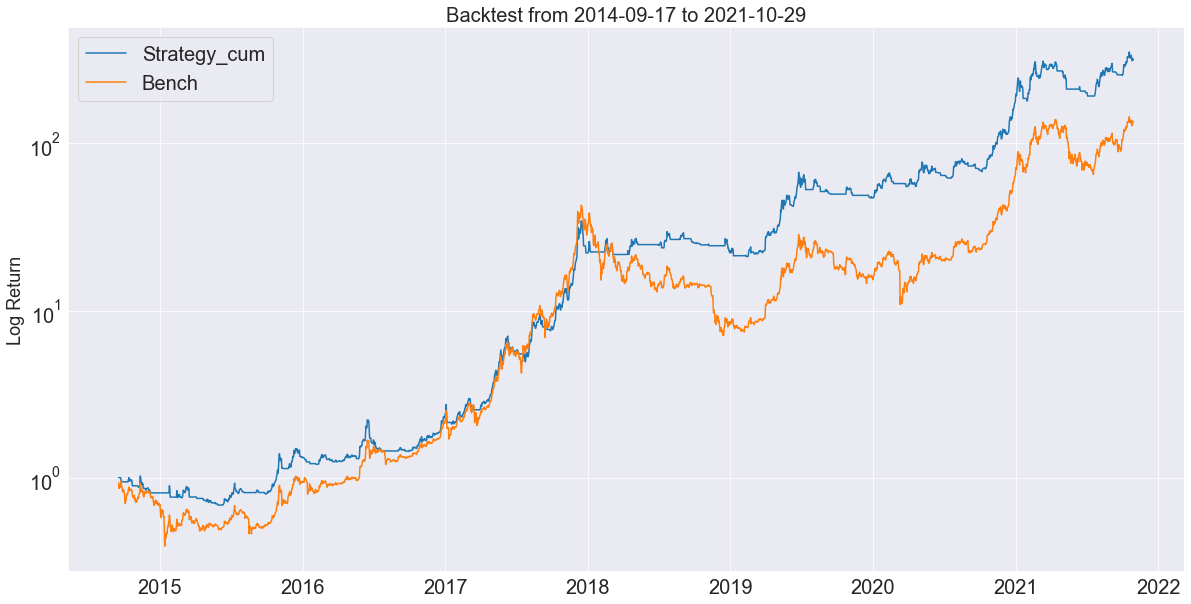

In [35]:
plot(res, "log") # "log" for log otherwise "" for lin
trade_analysis(df_tmp['signal'])

#### Equity Curve for Break Outs

In [36]:
df_tmp = break_out(close, lookback_low = 10, lookback_high = 20, metric = 'data')
res = df_tmp[['Strategy_cum', 'Bench']]
strategy_evaluation(res, ['Bench'], 3000, freq = 'D')

,CAGR,Volatility,Sharpe,Sortino,Max DD,MAR,SWR,Skew,Kurtosis
Portfolio,59.0%,39.0%,1.39,1.25,-52%,1.14,45.1%,1.03,14.054
Bench,65.7%,62.6%,1.12,1.35,-83%,0.79,43.3%,-0.166,7.439


Number of Trades:  46.0 
Average holding time:  24.0 
Trades per Year:  6.5


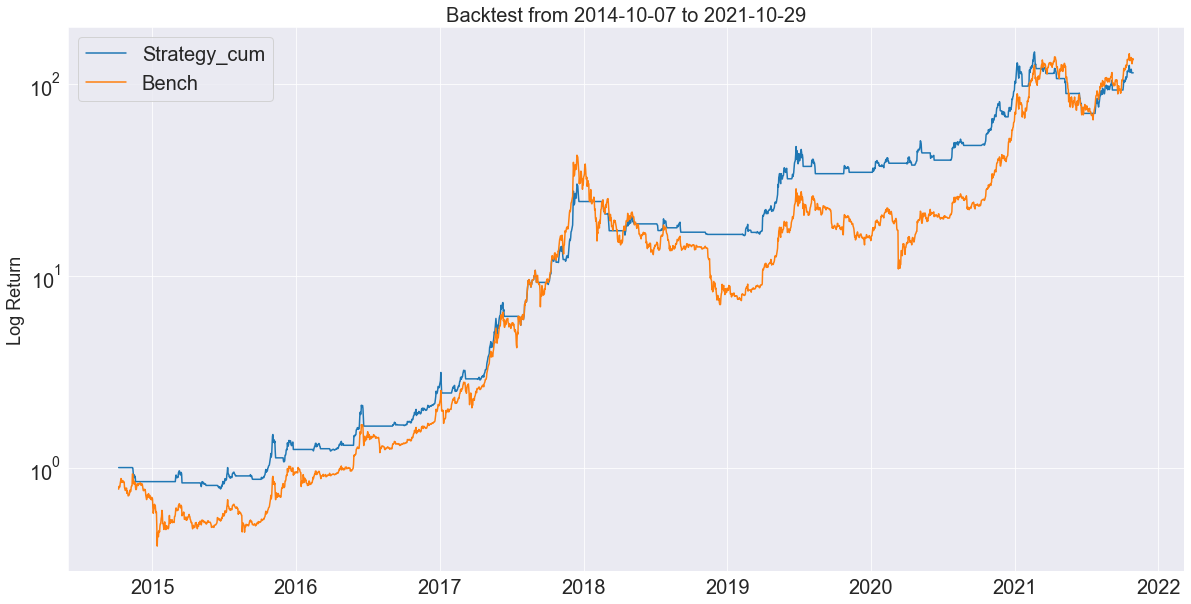

In [37]:
plot(res, "log") # "log" for log otherwise "" for lin
trade_analysis(df_tmp['signal'])

#### Equity Curve for Cross Overs

In [38]:
df_tmp = cross_over(close, lookback_low = 10, lookback_high = 35, metric = 'data')
res = df_tmp[['Strategy_cum', 'Bench']]
strategy_evaluation(res, ['Bench'], 3000, freq = 'D')

,CAGR,Volatility,Sharpe,Sortino,Max DD,MAR,SWR,Skew,Kurtosis
Portfolio,62.9%,46.1%,1.29,1.27,-69%,0.91,46.4%,0.385,9.573
Bench,62.7%,62.6%,1.09,1.32,-83%,0.76,40.4%,-0.162,7.381


Number of Trades:  29.0 
Average holding time:  53.0 
Trades per Year:  4.1


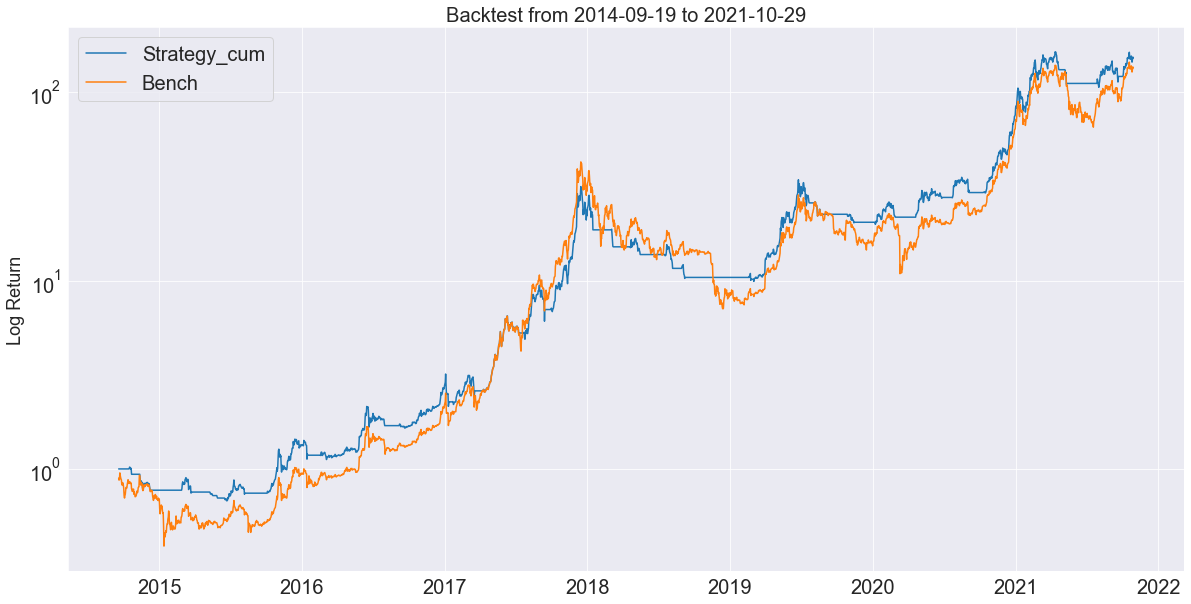

In [39]:
plot(res, "log") # "log" for log otherwise "" for lin
trade_analysis(df_tmp['signal'])